In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors

In [2]:
# Taking a set of 1 million samples
# Drawing 250 000 samples - this is new reference set
# 3.7 - 1 = 2.7 millions of test data

In [7]:
# Loading Data Set
dataset = pd.read_csv('filtered_dataset_.csv')
df = dataset.copy()

In [8]:
# Preprocess Data Set
df.drop(columns=['Unnamed: 0', 'Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port'], inplace=True)
df = df.astype(df.values).astype('float32')

In [11]:
delimiter_row = 1_000_000
df_ref_general = df.loc[0:delimiter_row]
df_testing = df.loc[delimiter_row:delimiter_row+50_000]

In [12]:
df_ref = df_ref_general.sample(frac=0.25)
df_ref.shape[0]

250000

#### df_ref - reference data. Subset of 250_000 samples drawn from original set of 1_000_000 samples
#### df_testing - test data

In [13]:
K = 5
neighbors = NearestNeighbors(n_neighbors=K)
neighbors.fit(df_ref.values)
distances, _ = neighbors.kneighbors(df_ref.values)

In [93]:
distances_nei = distances.copy()

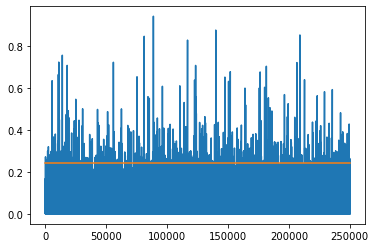

In [97]:
# Zero is included - distance to itself
plt.plot(distances_nei.mean(axis=1))
plt.plot([0,250_000], [np.percentile(distances_nei, 99.5), np.percentile(distances_nei, 99.5)])

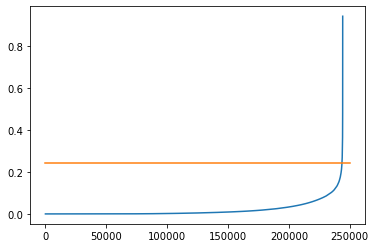

In [99]:
distances_mean_non_zeros = distances_nei.mean(axis=1)[distances_nei.mean(axis=1) != 0]
distances_mean_non_zeros
plt.plot(np.sort(distances_mean_non_zeros))
plt.plot([0,250_000], [np.percentile(distances_nei, 99.5), np.percentile(distances_nei, 99.5)])
# Checking distribution of samples with non-zero values
# There are many samples with near-zero values

anomalous_distance_threshold = np.percentile(distances_nei, 99.5)

In [109]:
anomalous_df = list()

start = time.time()

for index, row in df_testing.iterrows():
    distance, _ = neighbors.kneighbors([np.array(row.tolist())])
    if distance.mean() > anomalous_distance_threshold:
        anomalous_df.append(index)

stop = time.time() - start
avg_time = stop/df_testing.shape[0]
print(f"Avg processing time of single sample {avg_time}")

Avg processing time of single sample 0.0035141996115613575


In [115]:
import csv
  
with open('[KNN]anonmalous_indexes.csv', 'w', newline='') as f:
    write = csv.writer(f) 
    write.writerow(['index'])
    write.writerows([element] for element in anomalous_df)

In [113]:
print(f"Discovered {len(anomalous_df)} samples to be suspected as anomalous")

Discovered 243 samples to be suspected as anomalous
